# Titanic: Machine Learning from Disaster

## 데이터분석과 머신러닝 알고리즘으로 타이타닉 해상사고의 생존자를 예측하기

[RMS 타이타닉](https://ko.wikipedia.org/wiki/RMS_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89) 호의 침몰은 역사상 가장 슬픈 해상사고 중 하나입니다.

[위키피디아에 기록된 내용](https://ko.wikipedia.org/wiki/RMS_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89)에 따르면 RMS 타이타닉 호는 선내에 체육관과 수영장을 포함한 호화로운 부대시설을 갖추고 있었으나, 느슨한 규제때문에 구명 보트는 단 20척 밖에 보유하고 있지 않았다고 합니다. (이 구명 보트의 정원은 고작 1,178명 이었습니다) 구명보트에 타지 못한 승객들은 바다에 뛰어들었고 이 승객들은 수 분 내에 저체온증으로 사망하였으며, 구명 보트를 타고 있다가 몇 시간 뒤에 RMS 카르파티아에 의해 구조된 사람은 고작 706명 뿐 이었습니다.

이번 수업에서는 캐글의 [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/) 경진대회에 도전합니다. 타이타닉 해상사고 당시의 기록을 담아둔 [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/)의 데이터를 참고하여, 유사한 해상 사고가 발생했을 시 어떤 승객이 생존하며, 또한 어떤 승객이 사망하는지를 예측하는 예측 모델을 만들 것입니다. 이 과정에서 프로그래밍 언어 파이썬([Python](https://www.python.org/)), 파이썬의 데이터 분석 패키지 판다스([Pandas](https://pandas.pydata.org/)), 그리고 파이썬의 머신러닝&인공지능 라이브러리인 싸이킷런([scikit-learn](scikit-learn.org))에 대해 배워볼 것입니다.


## 컬럼 설명

(데이터는 [다음의 링크](https://www.kaggle.com/c/titanic/data)에서 다운받으실 수 있습니다)

  * **Survival** - 생존 여부. 0이면 사망, 1이면 생존한 것으로 간주합니다.
  * **Pclass** - 티켓 등급. 1등석(1), 2등석(2), 3등석(3)이 있으며, 1등석일수록 좋고 3등석일수록 좋지 않습니다.
  * **Sex** - 성별. 남자(male)와 여자(female)이 있습니다.
  * **Age** - 나이입니다. 틈틈히 빈 값이 존재하며, 소수점 값도 존재합니다.
  * **SibSp** - 해당 승객과 같이 탑승한 형재/자매(siblings)와 배우자(spouses)의 총 인원 수입니다.
  * **Parch** - 해당 승객과 같이 탑승한 부모(parents)와 자식(children)의 총 인원 수입니다.
  * **Ticket** - 티켓 번호입니다. 다양한 텍스트(문자열)로 구성되어 있습니다.
  * **Fare** - 운임 요금입니다. 소수점으로 구성되어 있습니다.
  * **Cabin** - 객실 번호입니다. 많은 빈 값이 존재하며, 다양한 텍스트(문자열)로 구성되어 있습니다.
  * **Embarked** - 선착장입니다. C는 셰르부르(Cherbourg)라는 프랑스 지역, Q는 퀸스타운(Queenstown)이라는 영국 지역, S는 사우스햄튼(Southampton)이라는 영국 지역입니다.


## Load Dataset

모든 데이터 분석의 시작은 주어진 데이터를 읽어오는 것입니다. [판다스(Pandas)](https://pandas.pydata.org/)에는 [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)라는 기능이 있는데, 이 기능을 통해 편리하게 데이터를 읽어올 수 있습니다. read_csv를 활용해 [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/) 경진대회에서 제공하는 두 개의 데이터(train, test)를 읽어오겠습니다. ([다운로드 링크](https://www.kaggle.com/c/titanic/data))

여기서 파일의 경로를 지정하는 방법에 주의하셔야 합니다. 파일 경로 지정은 컴퓨터의 설정마다 천차만별로 다르기 때문에 사전에 컴퓨터의 경로 지정 개념을 숙지해두셔야 합니다. 만일 read_csv를 실행할 때 (**FileNotFoundError**)라는 이름의 에러가 난다면 경로가 제대로 지정이 되지 않은 것입니다. 만일 **파일의 경로를 지정하는 법이 생각나지 않는다면 [다음의 링크](http://88240.tistory.com/122)를 통해 경로를 지정하는 법을 복습한 뒤 다시 시도해주세요.**

In [1]:
# 파이썬의 import를 활용해 데이터 분석용 패키지인 판다스(Pandas)를 읽어옵니다.
import pandas as pd

# train.csv 파일을 읽어옵니다. 여기서 PassengerId를 index로 지정해줍니다.
# (=이제 PassengerId를 통해 승객 정보를 읽어올 수 있습니다)
# 읽어온 데이터를 train이라는 이름의 변수에 할당합니다.
train = pd.read_csv("data/titanic/train.csv", index_col="PassengerId")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# head()로 train 데이터의 상위 5개를 띄웁니다.
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# train.csv 파일을 읽어온 방식과 동일하게 test.csv를 읽어옵니다.
# 이후 이 데이터를 test라는 이름의 변수에 저장합니다.
test = pd.read_csv("data/titanic/test.csv", index_col="PassengerId")

# 마찬가지로 행렬(row, column) 사이즈를 출력하고
print(test.shape)

# 전체 test 데이터에서 상위 5개만 출력합니다.
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Explore

훌륭한 데이터 사이언티스트와 그렇지 않은 데이터 사이언티스트의 차이점 중 하나는 데이터를 분석하는 능력입니다. 훌륭한 데이터 사이언티스트는 언제나 데이터를 완벽하게 이해했다고 확신할 수 있을 만큼 끈기 있게 데이터를 분석합니다. 이 과정을 탐험적 데이터 분석([Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis))이라고 합니다. 

탐험적 데이터 분석을 할 때는 종종 데이터 시각화를 병행합니다. 파이썬의 데이터 시각화 패키지는 다양한 것들이 있지만([matplotlib](https://matplotlib.org/), [seaborn](https://seaborn.pydata.org/), [bokeh](https://bokeh.pydata.org/en/latest/), [ggplot](http://ggplot.yhathq.com/), etc) 저희는 이 중에서 [matplotlib](https://matplotlib.org/)와 [seaborn](https://seaborn.pydata.org/) 을 주로 사용할 것입니다.



In [3]:
# matplotlib로 실행하는 모든 시각화를 자동으로 쥬피터 노트북에 띄웁니다.
# seaborn 도 결국에는 matplotlib를 기반으로 동작하기 때문에, seaborn으로 실행하는 모든 시각화도 마찬가지로 쥬피터 노트북에 자동적으로 띄워집니다.
%matplotlib inline

# 데이터 시각화 패키지 seaborn을 로딩합니다. 앞으로는 줄여서 sns라고 사용할 것입니다.
import seaborn as sns

# 데이터 시각화 패키지 matplotlib를 로딩합니다. 앞으로는 줄여서 plt라고 사용할 것입니다.
import matplotlib.pyplot as plt

### Sex

먼저 분석할 컬럼은 성별(Sex)입니다. 우리가 이전에 분석한대로, 성별(Sex) 컬럼은 타이타닉 데이터셋에서 가장 중요한 컬럼입니다. seaborn에서는 [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)이라는 간단한 기능을 통해 성별 컬럼을 시각화 할 수 있습니다.

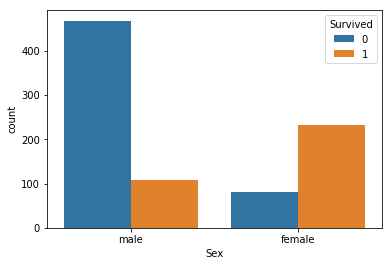

In [4]:
# 타이타닉의 train 데이터를 바탕으로 성별 컬럼을 시각화합니다.
# 크게 1) 남성 생존자, 2) 남성 사망자, 3) 여성 생존자, 4) 여성 사망자 를 시각화합니다.
sns.countplot(data=train, x="Sex", hue="Survived")

분석 결과 **여성 승객(female)이 남성 승객(male)에 비해 압도적으로 생존 확률이 높다**는 것을 파악할 수 있습니다.

비슷한 결과를 엑셀이나 pandas의 [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)로 도출해 낼 수 있습니다.

In [5]:
# pivot_table을 통해 성별(Sex)에 따른 생존률을 출력합니다.
pd.pivot_table(train, index="Sex", values="Survived")

,Survived
Sex,
female,0.742038
male,0.188908


[pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)로 분석한 결과, 남자 승객의 생존률은, 18.9% 여성 승객의 생존률은 74.2%가 나온다는 것을 알 수 있습니다. 즉, 여성 승객이 남성 승객에 비해 압도적으로 생존 확률이 높다고 판단할 수 있습니다.

같은 분석을 pivot table로도 할 수 있고 데이터 시각화로도 할 수 있다면, 둘 중 어떤 걸 사용하는게 좋을까요? 정답은 **둘 다 병행하는게 좋습니다**. pivot table과 데이터 시각화 모두 장단점이 있는데,

  * 데이터 시각화는 구체적인 수치(ex: 남성 승객이 생존할 확률은 구체적으로 몇 %인가?)를 알 수는 없지만, 그림으로 보여주기 때문에 굉장히 직관적입니다.
  * 반면 pivot table은 구체적인 수치를 보여주지만(ex: 남성 승객이 생존할 확률은 18.9%이다), 그 수치가 어떠한 의미를 가지는지 직관적으로 알기 어렵습니다. (ex: 그래서 남성에 비해 여성 승객의 생존률은 몇 배 차이가 나는가?)

그러므로 1) 데이터의 전반적인 분포를 알고 싶다면 데이터 시각화를, 2) 통계치 하나하나의 구체적인 수치를 보고 싶다면 pivot_table을 사용하는 것이 좋습니다.

이번에는 데이터 시각화와 pivot table로 다른 컬럼을 분석해보겠습니다.

### Pclass

다음으로 분석할 컬럼은 객실 등급(Pclass)입니다. 객실 등급은 크게 1등급(=퍼스트 클래스), 2등급(=비즈니스), 3등급(=이코노미) 로 나뉩니다. 추측컨데 객실 등급이 높을 수록 더 많은 비용을 지불한 타이타닉호의 VIP라고 볼 수 있습니다.

성별(Sex) 컬럼과 마찬가지로, 객실 등급(Pclass) 컬럼도 [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)으로 간단하게 분석할 수 있습니다.

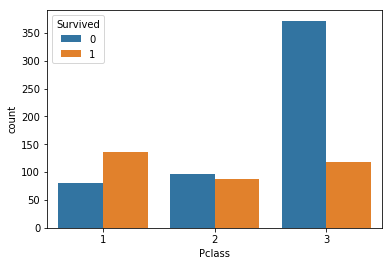

In [6]:
# 타이타닉의 train 데이터를 바탕으로 객실 등급(Pclass)을 시각화합니다.
# 크게 1) 1등급 생존자/사망자, 2) 2등급 생존자/사망자, 3) 3등급 생존자/사망자 의 총 인원 수를 알 수 있습니다.
sns.countplot(data=train, x="Pclass", hue="Survived")

분석 결과 **객실 등급(Pclass)이 높을수록 생존 확률이 더 높다**는 것을 알 수 있습니다. 조금 더 구체적으로 살펴보자면

  * 1등급은 생존자의 인원 수가 사망자의 인원 수보다 더 많지만, 2등급과 3등급은 그렇지 않다.
  * 3등급의 경우 생존자의 인원 수보다 사망자의 인원 수가 압도적으로 높다.
  
이번에는 [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)로 객실 등급(Pclass) 컬럼을 분석해보겠습니다.

In [7]:
# pivot_table을 통해 객실 등급(Pclass)에 따른 생존률을 출력합니다.
pd.pivot_table(train, index="Pclass", values="Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


분석 결과 객실 등급(Pclass)이 높을수록 생존률이 높다는 사실을 알 수 있었고, 특히나 객실 등급(Pclass)이 2등급인 경우 생존률이 1/2(50%), 3등급인 경우 생존률이 1/4(25%)도 되지 않는다는 사실을 발견할 수 있습니다.

### Embarked

다음에는 선착장(Embarked) 컬럼을 분석해보겠습니다. 선착장에는 크게 1) 셰르부르(Cherbourg, C) 2) 퀸스타운(Queenstown, Q) 3) 사우스햄튼(Southampton, S)의 세 종류가 있습니다.

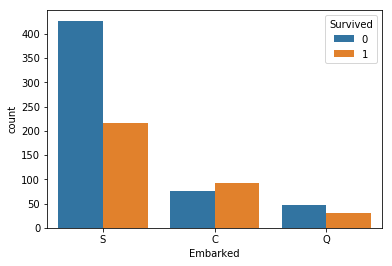

In [8]:
# 타이타닉의 train 데이터를 바탕으로 선착장(Embarked)을 시각화합니다.
# C, S, Q에서 탑승한 승객의 생존자/사망자의 총 인원수를 알 수 있습니다.
sns.countplot(data=train, x="Embarked", hue="Survived")

분석 결과 **셰르부르(Cherbourg, C)에서 탑승할수록 생존할 확률이 높으며, 사우스햄튼(Southampton, S)에서 탑승할수록 사망할 확률이 높다**는 것을 알 수 있습니다. 조금 더 구체적으로 살펴보자면

  * 사우스햄튼에서 탑승한 승객이 가장 많지만, 그만큼 많은 인원이 사망한다. 생존자의 두 배 가까운 인원이 사망하는 것으로 보인다.
  * 셰르부르에서 탑승한 인원은 사우스햄튼에 비해 상대적으로 적지만, 생존자의 인원이 사망자의 인원보다 많다.
  * 퀸스타운에서 탑승한 사람은 사망할 확률이 미세하게 높지만, 애초에 탑승객 인원이 많지 않다.
  
이번에는 [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)로 선착장(Embarked) 컬럼을 분석해보겠습니다.

In [9]:
# pivot_table을 통해 선착장(Embarked)에 따른 생존률을 출력합니다.
pd.pivot_table(train, index="Embarked", values="Survived")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


확인 결과 셰르부르(Cherbourg, C), 퀸스타운(Queenstown, Q), 사우스햄튼(Southampton, S)에서 탑승한 승객의 생존률은 각각 55%, 38%, 33%라는 것을 알 수 있습니다.

### Age & Fare

이번에는 조금 다른 데이터 시각화 방식으로 두 개의 컬럼의 상관관계를 분석해보겠습니다. 분석하고 싶은 컬럼은 나이(Age)와 운임요금(Fare) 입니다. 두 컬럼이 어떤 상관관계가 있는지를 분석하고 싶다면, seaborn의 [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html) 을 사용할 수 있습니다.

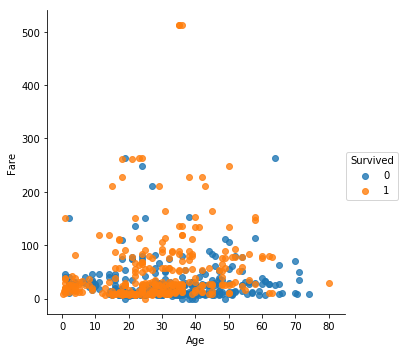

In [10]:
# lmplot을 통해 나이(Age)와 운임요금(Fare)의 상관관계를 분석합니다.
# 생존자와 사망자의 차이를 보여주기 위해 hue="Survived" 옵션을 넣습니다.
# 또한 회귀(Regression)선은 일반적으로 잘 쓰이지 않기 때문에 fit_reg에 False를 넣습니다.
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

lmplot을 보는 방법은 간단합니다. 

  * 특정 위치에 오렌지색 점이 몰려있다면, 그 부분에 있는 승객은 생존할 확률이 높다는 것을 알 수 있고
  * 정 반대로 특정 위치에 파란색 점이 몰려있다면, 그 부분에 있는 승객은 생존 확률이 낮다는 것을 알 수 있습니다.
  
다만 아쉽게도 위 그래프에서는 특정 위치에 오렌지색 점이나 파란색 점이 몰려있지 않습니다.

이유를 알아보기 위해 자세히 살펴보면, 그래프의 상단부(운임요금 $500 이상)에 오렌지색 점이 세 개 있는 것을 알 수 있습니다. 이렇게 전체 데이터에서 동떨어진 몇몇 데이터를 아웃라이어(outlier)라고 합니다. 데이터 시각화를 할 때는 언제나 이런 아웃라이어를 제거해줘야 데이터를 더 자세히 볼 수 있습니다.

In [11]:
# 판다스의 색인(indexing) 기능을 활용하여, 운임요금(Fare)이 500달러 미만인 데이터만 가져옵니다.
# 이를 low_fare라는 변수에 할당합니다.
low_fare = train[train["Fare"] < 500]

# train 데이터와 low_fare 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
# low_fare 데이터가 train 데이터보다 3개 적은 것을 확인할 수 있는데 (891 > 888),
# 이는 low_fare에서는 $500달러 이상을 지불한 세 명의 승객을 제거했기 때문입니다.
train.shape, low_fare.shape

((891, 11), (888, 11))

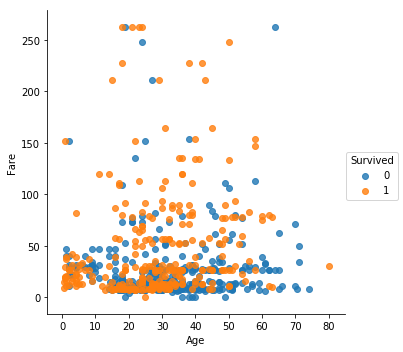

In [12]:
# lmplot을 통해 나이(Age)와 운임요금(Fare)의 상관관계를 분석합니다.
# 다만 이전과는 달리 이번에는 train 데이터가 아닌 low_fare 데이터를 시각화 합니다.
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

아웃라이어를 제거한 새로운 lmplot을 보면, 운임요금을 더 많이 낼 수록 사망자보다 생존자가 더 많아진다는 사실을 알 수 있습니다. 더 정확히 이야기하자면,

  * 50달러 이상, 100달러 이상, 200달러 이상을 기준으로 생존자와 사망자의 비율이 크게 차이나기 시작하며
  * 운임요금과 나이간의 특정한 상관관계는 보이지 않는 것 같습니다.
  
경우에 따라서는 더 많은 데이터를 아웃라이어라고 간주하고 이를 제거한 뒤 시각화를 할 수 있습니다. 가령 이번에는 운임요금이 100달러 이상인 데이터를 아웃라이어로 간주하겠습니다.

In [13]:
# 판다스의 색인(indexing) 기능을 활용하여, 운임요금(Fare)이 100달러 미만인 데이터만 가져옵니다.
# 이를 low_low_fare라는 변수에 할당합니다.
low_low_fare = train[train["Fare"] < 100]

# train, low_fare, low_low_fare 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
# low_low_fare에서는 train 데이터에 비해 무려 53명의 승객이 더 적습니다. (891 > 838)
train.shape, low_fare.shape, low_low_fare.shape

((891, 11), (888, 11), (838, 11))

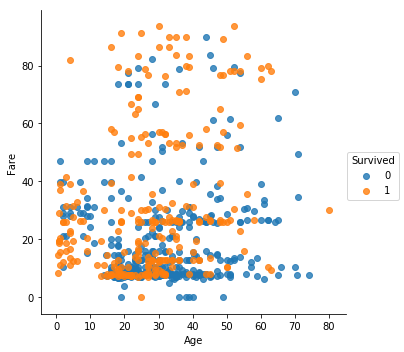

In [14]:
# lmplot을 통해 나이(Age)와 운임요금(Fare)의 상관관계를 분석합니다.
# 이번에는 low_low_fare 데이터를 시각화 합니다.
sns.lmplot(data=low_low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

결과를 자세히 살펴보면, 나이가 15세 이하인 승객은 생존 확률이 높으며, 이 중에서도 운임요금을 20달러보다 적게 지불한 승객은 생존 확률이 확연히 높다는 것을 알 수 있습니다.

### SibSp, Parch

다음으로 분석할 컬럼은 SibSp와 Parch입니다. 앞서 설명드린대로 SibSp는 "나와 함께 타이타닉호에 탑승한 형제&자매와 배우자의 총 인원 수", Parch는 "나와 함게 타이타닉호에 탑승한 부모&자식의 총 인원 수" 입니다.

SibSp와 Parch는 얼핏 다른 컬럼처럼 보이지만, 실제로는 둘 다 가족 관계를 나타내는 컬럼으로 볼 수 있습니다. 그러므로 SibSp와 Parch를 더하면 가족의 총 인원 수(FamilySize)가 나옵니다.

In [15]:
# train 데이터의 SibSp와 Parch 컬럼을 더해서 FamilySize라는 새로운 컬럼을 만듭니다.
# 다만 가족 수를 셀 때는 언제나 나 자신도 포함하는데, 나 자신은 SibSp와 Parch 중 어디에도 포함되어 있지 않기 때문에,
# 무조건 1을 더해서 총 인원 수를 하나 늘려줍니다.
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터의 상위 5개를 띄우되, SibSp와 Parch, 그리고 FamilySize 컬럼만 출력합니다.
train[["SibSp", "Parch", "FamilySize"]].head()

(891, 12)


,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


가족 수(FamilySize)를 구했으면 이를 seaborn의 countplot으로 시각화 해보겠습니다.

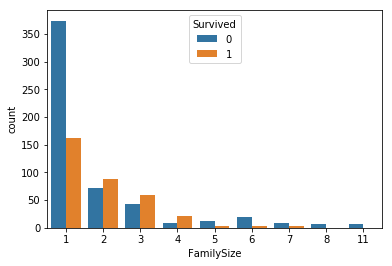

In [16]:
# 타이타닉의 train 데이터를 바탕으로 가족 수(FamilySize)을 시각화합니다.
# 가족 수가 늘어날 때 마다 생존자/사망자의 변화를 볼 수 있습니다.
sns.countplot(data=train, x="FamilySize", hue="Survived")

결과를 자세히 살펴보면 다음과 같은 패턴이 있다는 것을 알 수 있습니다.

  * 타이타닉호에 혼자 탑승한 경우(FamilySize == 1) 생존 확률이 굉장히 낮습니다.
  * 타이타닉호에 적당한 인원의 가족이 함께 탑승한 경우 (2 <= FamilySize <= 4) 생존 확률이 상대적으로 높다는 것을 알 수 있습니다.
  * 하지만 타이타닉호에 탑승한 가족의 인원 수가 너무 많은 경우 (FamilySize >= 5) 생존 확률이 매우 낮다는 것을 알 수 있습니다.

이러한 숫자 컬럼은 구역을 나눠서 countplot으로 분석하면 조금 더 명확하게 결과를 확인할 수 있습니다.

In [17]:
# 가족 수(FamilSize)가 1인 승객을 가져와서, FamilyType 컬럼에 Single 이라는 값을 넣어줍니다.
train.loc[train["FamilySize"] == 1, "FamilyType"] = "Single"

# 가족 수(FamilSize)가 2 이상 5 미만인 승객을 가져와서, FamilyType 컬럼에 Nuclear(핵가족) 이라는 값을 넣어줍니다.
train.loc[(train["FamilySize"] > 1) & (train["FamilySize"] < 5), "FamilyType"] = "Nuclear"

# 가족 수(FamilSize)가 5 이상인 승객을 가져와서, FamilyType 컬럼에 Big(대가족) 이라는 값을 넣어줍니다.
train.loc[train["FamilySize"] >= 5, "FamilyType"] = "Big"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터의 상위 10개를 띄우되, FamilySize와 FamilyType 컬럼만 출력합니다.
train[["FamilySize", "FamilyType"]].head(10)

(891, 13)


,FamilySize,FamilyType
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single
6,1,Single
7,1,Single
8,5,Big
9,3,Nuclear


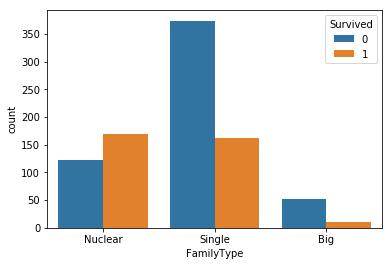

In [18]:
# 타이타닉의 train 데이터를 바탕으로 가족 형태(FamilyType)을 시각화합니다.
# 싱글(Single), 핵가족(Nuclear), 대가족(Big)의 생존자/사망자의 총 인원 수를 알 수 있습니다.
sns.countplot(data=train, x="FamilyType", hue="Survived")

분석 결과 핵가족(Nuclear)의 생존률이 높고, 나머지 두 타입(Single, Big)의 생존률이 확연히 낮다는 것을 알 수 있습니다.
  
이번에는 [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)로 가족 형태(FamilyType) 컬럼을 분석해보겠습니다.

In [19]:
# pivot_table을 통해 가족 형태(FamilyType)의 변화에 따른 생존률을 출력합니다.
pd.pivot_table(data=train, index="FamilyType", values="Survived")

,Survived
FamilyType,
Big,0.161290
Nuclear,0.578767
Single,0.303538


분석 결과 혼자 탑승했을 경우(Single) 생존률이 30.3%, 핵가족(Nuclear)인 경우 생존률이 57.8%, 그리고 대가족(Big)인 경우 경우 생존률이 16.1%밖에 되지 않는다는 것을 알 수 있습니다.

### Name

다음으로 분석할 컬럼은 승객 이름(Name)입니다. 승객의 이름은 얼핏 살펴보면 굉장히 분석하기 까다로워 보이지만, 실은 매우 간단한 패턴으로 이루어져 있습니다. 일단 ```,```과 ```.```을 기준으로

  1. ```,```의 앞에 있는 부분이 성(SurName)이며,
  2. ```,```과 ```.``` 사이에 있는 부분은 승객의 호칭(Title)입니다.
  3. 마지막으로 ```.``` 뒤에 있는 부분은 이름(FirstName) 입니다.
  
가령 ```Braund, Mr. Owen Harris``` 이라는 이름의 승객은, 1) Braund라는 성을 가진, 2) Mr라는 호칭을 가진, 3) Owen Harris 라는 이름을 가진 승객으로 해석할 수 있습니다.

In [20]:
# train 데이터의 승객 이름(Name) 컬럼의 상위 5개를 출력합니다.
# 앞서 설명한것과 동일한 패턴으로 이름이 출력되는 것을 확인할 수 있습니다.
train["Name"].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [21]:
# get_title이라는 이름의 함수를 정의합니다. 이 함수는 name이라는 변수를 인자로 받습니다.
# 이 함수는 이름을 받았을 때 이름에서 타이틀을 반환해줍니다.
# 가령 name에 "Braund, Mr. Owen Harris"가 들어오면 최종 결과는 Mr를 반환해줍니다.
def get_title(name):
    # 먼저 name을 , 을 기준으로 쪼갭니다. 쪼갠 결과는 0) Braund와 1) Mr. Owen Harris가 됩니다.
    # 여기서 1)번을 가져온 뒤 다시 . 을 기준으로 쪼갭니다. 쪼갠 결과는 0) Mr와 1) Owen Harris가 됩니다.
    # 여기서 0)번을 반환합니다. 최종적으로는 Mr를 반환하게 됩니다.
    return name.split(", ")[1].split('. ')[0]

# 모든 Name 컬럼 데이터에 get_title 함수를 적용합니다.
# 그 결과에서 unique를 통해 중복된 값을 제거합니다.
train["Name"].apply(get_title).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

여기에서 우리는 호칭(Title)만을 분리한 뒤, 주요 호칭별 승객의 생존률을 시각화 해보겠습니다.

타이타닉호의 승객들은 굉장히 다양한 호칭을 갖고 있습니다. 우리가 일반적으로 알고 있는 ```Mr```, ```Mrs```, ```Miss```는 물론, ```Master```(이 당시는 결혼하지 않은 남성을 [Master]( https://en.wikipedia.org/wiki/English_honorifics#Common_titles)라고 호칭했습니다), ```Sir```(남자의 존칭), ```Lady```(여성의 존칭), ```the Countess```(백작 부인) 등도 존재합니다. 하지만 여기서 마이너한 호칭(```Sir```, ```Lady```, ```the Countess```, etc)은 제외하고 1) ```Mr```, 2) ```Mrs```, 3) ```Miss```, 4) ```Master``` 이렇게 네 가지 주요 호칭만 시각화 해보겠습니다.

In [22]:
# 호칭을 저장하는 컬럼은 없으므로 "Title"이라는 새로운 컬럼을 만듭니다.
# Name에 "Mr"가 포함되어 있으면 Title 컬럼에 "Mr"이라는 값을 넣어줍니다.
train.loc[train["Name"].str.contains("Mr"), "Title"] = "Mr"

# Name에 "Miss"가 포함되어 있으면 Title 컬럼에 "Miss"이라는 값을 넣어줍니다.
train.loc[train["Name"].str.contains("Miss"), "Title"] = "Miss"

# Name에 "Mrs"가 포함되어 있으면 Title 컬럼에 "Mrs"이라는 값을 넣어줍니다.
train.loc[train["Name"].str.contains("Mrs"), "Title"] = "Mrs"

# Name에 "Master"가 포함되어 있으면 Title 컬럼에 "Master"이라는 값을 넣어줍니다.
train.loc[train["Name"].str.contains("Master"), "Title"] = "Master"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터의 상위 10개를 띄우되, Name과 Title 컬럼만 출력합니다.
train[["Name", "Title"]].head(10)

(891, 14)


,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr
6,"Moran, Mr. James",Mr
7,"McCarthy, Mr. Timothy J",Mr
8,"Palsson, Master. Gosta Leonard",Master
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs


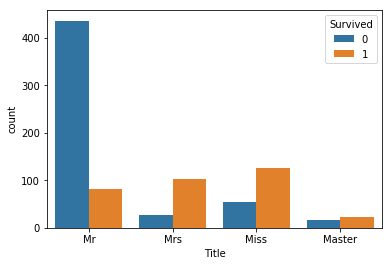

In [23]:
# 타이타닉의 train 데이터를 바탕으로 호칭(Title)을 시각화합니다.
# "Mr", "Mrs", "Miss", "Master"의 생존자/사망자의 총 인원 수를 알 수 있습니다.
sns.countplot(data=train, x="Title", hue="Survived")

분석 결과 여성(```Mrs```, ```Miss```)의 성별은 우리가 이전에 분석한대로 생존률이 매우 높으며, 성인 남성(```Mr```)의 경우에도 우리가 이전에 분석한대로 생존률이 매우 낮다는 걸 알 수 있습니다.

여기서 눈여겨 볼 점은, 결혼하지 않은 남성(```Master```)입니다. 이 호칭을 보유한 사람은 남성임에도 불구하고 생존률이 상대적으로 높습니다. 그 뜻은, 호칭(Title)이 ```Master```인 사람은 성별(Sex)이 남성(male)임에도 불구하고 생존률이 높을 것이다.라고 추측할 수 있습니다.

이번에는 [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)로 호칭(Title) 컬럼을 분석해보겠습니다.

In [24]:
# pivot_table을 통해 호칭(Title)에 따른 생존률을 출력합니다.
pd.pivot_table(train, index="Title", values="Survived")

,Survived
Title,
Master,0.575000
Miss,0.700000
Mr,0.158301
Mrs,0.790698


분석 결과 호칭이 ```Mr```인 승객의 생존률은 15.8%밖에 되지 않지만, ```Miss```인 승객의 생존률은 70%, ```Mrs```인 승객의 생존률은 79%, 그리고 결정적으로 ```Master```인 승객의 생존률은 57.5%로 매우 높다는 것을 알 수 있습니다.

## Preprocessing

분석이 끝났으면, 이제 본격적으로 테스트 데이터의 생존자/사망자를 예측하는 작업을 진행하겠습니다.

데이터를 **의사결정나무(Decision Tree)** 계열의 머신러닝(Machine Learning) 알고리즘에 넣기 위해서는, 데이터를 머신러닝 알고리즘이 이해할 수 있는 형태로 변환해줘야 합니다. 이 과정을 전문용어로 **전처리(Preprocessing)**라고 합니다.

[scikit-learn](scikit-learn.org) 에서 제공하는 머신러닝 알고리즘에 데이터를 넣을 수 있는 기본 조건은 다음과 같습니다.

1. 모든 데이터는 숫자(정수형, 소수점 등)로 구성되어 있어야 한다.
1. 데이터에 빈 값이 없어야 한다.

여기서는 타이타닉 데이터에 있는 세 컬럼(**Sex**, **Fare**, **Embarked**)을 전처리하는 과정에 대해서 보여드립니다.


### Encode Sex

먼저 성별(Sex) 컬럼을 전처리 합니다.

우리는 기본적인 영어 단어의 의미를 숙지하고 있기 때문에 male(남성)과 female(여성)이 어떤 것을 뜻하는지 알고 있습니다. 하지만 Decision Tree는 내부에서 수학과 통계학으로 돌아가는 알고리즘이므로 male과 female의 의미를 알지 못합니다. 때문에 성별(Sex) 컬럼을 Decision Tree가 이해할 수 있는 방식으로 바꿔줘야 할 필요가 있습니다.

앞서 설명드린대로, [scikit-learn](scikit-learn.org)의 머신러닝 알고리즘에 데이터를 넣을 수 있는 기본 조건 중 하나는 모든 데이터는 숫자로 구성되어 있어야 한다, 즉 **숫자면 어떻게든 들어간다** 입니다. 그러므로 우리는 성별(Sex) 컬럼을 숫자로 바꿔줄 것입니다.

성별 컬럼을 전처리하는 가장 쉬운 방법은 male은 0으로, female은 1로 바꿔주는 것입니다. 이를 전문 용어로 **인코딩(Encoding)**이라고 합니다.


In [25]:
# 성별(Sex) 값이 male인 경우 0으로, female인 경우 1로 수정합니다.
# 단 Sex 컬럼을 바로 수정하지 않고, Sex_encode라는 새로운 컬럼을 추가해서 여기에 값을 넣습니다.
# 전처리를 할 때는 언제나 이런 방식으로 원본을 유지하고 사본에다가 작업해주는게 좋습니다.
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터에서 Sex 컬럼과 Sex_encode 컬럼에 대한 상위 5개의 정보를 띄웁니다.
train[["Sex", "Sex_encode"]].head()

(891, 15)


,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


In [26]:
# train 데이터의 성별(Sex) 컬럼을 전처리해준 방식과 동일하게 test 데이터도 전처리를 해줍니다.
# 즉, Sex_encode 컬럼에 male이면 0을, female을 1을 대입해줍니다.
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# test 데이터에서 Sex 컬럼과 Sex_encode 컬럼에 대한 상위 5개의 정보를 띄웁니다.
test[["Sex", "Sex_encode"]].head()

(418, 11)


,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


### Fill in missing fare

앞서 설명드린대로, [scikit-learn](scikit-learn.org)의 머신러닝 알고리즘에 데이터를 넣을 땐 언제나 데이터에 값이 채워져 있어야 합니다. 만일 데이터에 **NaN**(Not a Number)이라는 값이 있다면 이는 비어있다는 의미이며, 이 데이터를 머신러닝 알고리즘에 넣으면 에러가 발생합니다.

타이타닉 데이터에 운임요금(Fare) 컬럼을 살펴보면, train 데이터에는 빈 값이 없지만 test 데이터에는 딱 하나 빈 값이 있다는 것을 확인할 수 있습니다. (1044번 승객, Storey, Mr. Thomas) 그러므로 운임요금(Fare) 컬럼을 DecisionTree에 넣기 위해서는 1044번 승객의 운임요금 값을 다른 값으로 채워줘야 합니다.

In [27]:
# train 데이터에서 운임요금(Fare)이 비어있는 승객을 검색합니다. 검색 결과 아무런 값도 나오지 않습니다.
# 즉, train 데이터에는 운임요금(Fare)이 비어있는 승객이 한 명도 없다는 것으로 이해할 수 있습니다.
train[train["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyType,Title,Sex_encode
PassengerId,,,,,,,,,,,,,,,


In [28]:
# test 데이터에서 운임요금(Fare)이 비어있는 승객을 검색합니다.
# 검색 결과 1044번 승객(Storey, Mr. Thomas)의 운임요금(Fare) 값이 비어있다는 것을(NaN) 확인할 수 있습니다.
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


운임요금(Fare)이 비어있는 값을 채우는 가장 일반적인 방법은 **train 데이터의 운임요금(Fare)의 평균(mean)을 집어넣는 것입니다**. (```train["Fare"].mean()```) 하지만 전체 test 데이터중에 단 하나의 값만 비어있기 때문에, 평균이 아닌 적당한 값을 집어넣어도 정확도의 손해 없이 잘 동작할 것 같습니다.

그러므로 편리하게 test 데이터의 빈 운임요금(Fare) 값은 0으로 채우도록 하겠습니다.

In [29]:
# 앞서 성별(Sex) 컬럼을 전처리한 것과 마찬가지로,
# 원본(Fare)을 고치지 않고 사본(Fare_fillin)을 만들어 그 곳에 빈 값을 집어넣겠습니다.
train["Fare_fillin"] = train["Fare"]

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터에서 Fare 컬럼과 Fare_fillin 컬럼에 대한 상위 5개의 정보를 띄웁니다.
train[["Fare", "Fare_fillin"]].head()

(891, 16)


,Fare,Fare_fillin
PassengerId,,
1,7.2500,7.2500
2,71.2833,71.2833
3,7.9250,7.9250
4,53.1000,53.1000
5,8.0500,8.0500


In [30]:
# train 데이터를 다룬 것과 비슷한 방식하게
# test 데이터도 사본을 만듭니다.
test["Fare_fillin"] = test["Fare"]

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# test 데이터에서 Fare 컬럼과 Fare_fillin 컬럼에 대한 상위 5개의 정보를 띄웁니다.
test[["Fare", "Fare_fillin"]].head()

(418, 12)


,Fare,Fare_fillin
PassengerId,,
892,7.8292,7.8292
893,7.0000,7.0000
894,9.6875,9.6875
895,8.6625,8.6625
896,12.2875,12.2875


In [31]:
# test 데이터에서 운임요금(Fare) 값이 비어있는 승객을 검색한 뒤,
# 해당 승객의 운임요금(Fare_fillin) 값을 0으로 채워줍니다.
test.loc[test["Fare"].isnull(), "Fare_fillin"] = 0

# 이후 다시 한 번 test 데이터에서 운임요금(Fare)이 비어있는 승객을 검색합니다.
# 검색 결과 1044번 승객의 운임요금의 사본(Fare_fillin)에 비어있던 값이 0으로 채워졌다는 걸 알 수 있습니다.
test.loc[test["Fare"].isnull(), ["Fare", "Fare_fillin"]]

,Fare,Fare_fillin
PassengerId,,
1044,NaN,0.0


### Encode Embarked

그 다음은 선착장(Embarked)을 전처리하겠습니다.

선착장(Embarked)도 성별(Sex)과 마찬가지로 인코딩(Encoding) 대상입니다. 사람인 우리도 **C**, **S**, **Q**가 어떤 의미인지 설명을 들어야 할 수 있는데, 수학과 통계학으로 돌아가는 Decision Tree가 이해할 리 만무하겠죠. 그러므로 선착장(Embarked) 컬럼도 Decision Tree가 이해할 수 있는 방식으로 바꿔줘야 합니다.

앞서 설명드린대로 Decision Tree에 데이터를 넣기 위해서는 모든 데이터가 숫자로 구성되어 있어야 합니다. 이 설명을 참고한다면 선착장(Embarked)을 다음과 같이 인코딩 할 수 있습니다.

  * C == 0
  * S == 1
  * Q == 2
  
하지만 이런 방식으로 선착장을 인코딩 할 경우, Decision Tree는 다음과 같은 오해를 할 수 있습니다.

"어 S가 1이고 Q가 2라면, 그럼 2 * S == Q 인가? 내지는 S + S == Q 인가?"

하지만 S(Southampton)와 Q(Queenstown)은 전혀 다른 지역이며, 두 지역을 더하거나 곱한다고 같아지는 것은 말이 되지 않습니다.
  
그러므로 이 경우에는, 1) C, S, Q를 숫자로 변환해주되, 2) 세 값에 특정 연산(덧셈, 뺄셈, 곱셈, 나눗셈 등)을 한다고 동일해지는 현상이 나오지 않도록 인코딩 해줘야 합니다. 우리는 이 방식을 [원 핫 인코딩(One Hot Encoding)](https://minjejeon.github.io/learningstock/2017/06/05/easy-one-hot-encoding.html)이라고 합니다. 원 핫 인코딩을 통해 선착장(Embarked)을 인코딩 하면 다음과 같은 결과가 나옵니다.

  * C == [1, 0, 0]
  * S == [0, 1, 0]
  * Q == [0, 0, 1]

이제 C, S, Q를 더하거나 곱하거나 빼고 나눠도 같아질 일은 없을 겁니다.

파이썬에서는 매우 간단한 방법으로 One Hot Encoding을 할 수 있습니다. 여기서 편의를 위해 프로그래밍 언어의 관례(Convention)를 빌려올텐데, 프로그래밍 언어에서 True는 1로, False는 0으로 간주합니다. (즉, True == 1, False == 0 입니다) 이 관례를 활용하면 다음과 같이 선착장(Embarked)을 One Hot Encoding 할 수 있습니다.

  * C == [True, False, False]
  * S == [False, True, False]
  * Q == [False, False, True]

이제 이 관례를 활용해 선착장(Embarked) 컬럼을 One Hot Encoding 해보겠습니다. 코드는 다음과 같습니다.

In [32]:
# 먼저 Embarked 컬럼이 C이면 True, C가 아니면 False인 색인 코드를 작성합니다.
# 그리고 여기서 나온 결과를 그대로 Embarked_C 라는 새로운 컬럼에 대입합니다.
# 이제 Embarked_C 컬럼은 승객이 C(Cherbourg)에서 탑승했으면 True, 그렇지 않으면 False가 나옵니다.
train["Embarked_C"] = train["Embarked"] == "C"

# 비슷한 방식으로 Embarked_S 컬럼을 추가합니다.
# 승객이 S(Southampton)에서 탑승했으면 True, 그렇지 않으면 False가 나옵니다.
train["Embarked_S"] = train["Embarked"] == "S"

# 비슷한 방식으로 Embarked_Q 컬럼을 추가합니다.
# 승객이 Q(Queenstown)에서 탑승했으면 True, 그렇지 않으면 False가 나옵니다.
train["Embarked_Q"] = train["Embarked"] == "Q"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터의 상위 5개를 띄우되, Embarked와 직접적으로 연관된 컬럼만 따로 출력합니다.
train[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(891, 19)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [33]:
# test 데이터도 train 데이터와 동일한 방식으로
# Embarked_C, Embarked_S, Embarked_Q 컬럼을 추가합니다.
test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# test 데이터의 상위 5개를 띄우되, Embarked와 직접적으로 연관된 컬럼만 따로 출력합니다.
test[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(418, 15)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


### Age

다음으로 전처리할 컬럼은 나이(Age) 컬럼입니다.

나이 컬럼을 그대로 Decision Tree에 넣어보면 재미있는 사실을 알 수 있는데, 놀랍게도 캐글 스코어가 오히려 나빠지는 것을 발견할 수 있습니다. 데이터를 분석하다보면 이러한 현상을 가끔 발견할 수 있는데, 이런 경우 컬럼을 그대로 넣지 않고 약간의 수정을 거쳐 Decision Tree에 넣어줘야 합니다. 이러한 일을 전문용어로 [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering) 이라고 합니다.

가령, Decision Tree에 숫자(정수형, 소수점) 데이터를 넣을 때 주의할 점은, Decision Tree는 숫자에서 임의의 구역을 나눠 가지를 뻗지만(ex: ```Fare_fillin <= 28.231```) 이 임의의 구역이 언제나 좋은 결과를 보장한다고 장담할 수 없습니다. 이 경우 Decision Tree에게 구역을 나누는 것을 맡기지 않고 우리가 직접 구역을 나누면 점수가 좋아지기도 합니다.

이번에는 나이(Age) 컬럼을 그대로 넣지 않고 우리가 직접 구역을 나눠서 넣어보겠습니다. 구역을 나누는 기준은 앞서 데이터시각화를 통해 분석한 대로 ("나이가 15세 이하인 승객은 생존 확률이 높으며") 15세를 기준으로 나눠보겠습니다.

In [34]:
# train 데이터에 Child라는 이름의 새로운 컬럼을 추가합니다.
# 이 컬럼은 나이가 15세 미만일 경우 어린아이라고 가정하고(True), 반대로 15세 이상일 경우 어른이라고 가정합니다(False).
train["Child"] = train["Age"] < 15

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터의 상위 10개를 띄우되, Age 컬럼과 Child 컬럼만 출력합니다.
train[["Age", "Child"]].head(10)

(891, 20)


,Age,Child
PassengerId,,
1,22.0,False
2,38.0,False
3,26.0,False
4,35.0,False
5,35.0,False
6,NaN,False
7,54.0,False
8,2.0,True
9,27.0,False


In [35]:
# test 데이터에도 train 데이터와 동일한 방식으로 Child 컬럼을 추가합니다.
test["Child"] = test["Age"] < 15

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# test 데이터의 상위 10개를 띄우되, Age 컬럼과 Child 컬럼만 출력합니다.
test[["Age", "Child"]].head(10)

(418, 16)


,Age,Child
PassengerId,,
892,34.5,False
893,47.0,False
894,62.0,False
895,27.0,False
896,22.0,False
897,14.0,True
898,30.0,False
899,26.0,False
900,18.0,False


### FamilySize

다음으로 전처리 할 컬럼은 가족 수(FamilySize)입니다. 가족 수도 나이(Age) 컬럼과 마찬가지로, 아무런 수정도 거치지 않은 채 그대로 넣어주면 캐글 스코어가 오히려 나빠집니다. 그러므로 가족 수 컬럼도 Decision Tree에게 맡기지 않고 우리가 직접 구역을 나눠주는 것이 좋습니다.

In [36]:
# train 데이터의 SibSp와 Parch 컬럼을 더해서 FamilySize라는 새로운 컬럼을 만듭니다.
# 다만 가족 수를 셀 때는 언제나 나 자신도 포함하는데, 나 자신은 SibSp와 Parch 중 어디에도 포함되어 있지 않기 때문에,
# 무조건 1을 더해서 총 인원 수를 하나 늘려줍니다.
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터의 상위 5개를 띄우되, SibSp와 Parch, 그리고 FamilySize 컬럼만 출력합니다.
train[["SibSp", "Parch", "FamilySize"]].head()

(891, 20)


,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


In [37]:
# test 데이터도 train 데이터와 동일한 방식으로 FamilySize 컬럼을 만듭니다.
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# test 데이터의 상위 5개를 띄우되, SibSp와 Parch, 그리고 FamilySize 컬럼만 출력합니다.
test[["SibSp", "Parch", "FamilySize"]].head()

(418, 17)


,SibSp,Parch,FamilySize
PassengerId,,,
892,0,0,1
893,1,0,2
894,0,0,1
895,0,0,1
896,1,1,3


In [38]:
# 가족 수(FamilySize) 컬럼을 활용해 세 가지 구역을 나타내는 세 개의 새로운 컬럼을 만듭니다.
# 먼저 가족 수가 1명일 경우 Single 컬럼의 값에 True를, 1명이 아닐 경우 False를 대입합니다.
train["Single"] = train["FamilySize"] == 1

# 이후 가족 수가 2에서 4명 사이일 경우 Nuclear 컬럼의 값에 True를, 그렇지 않을 경우 False를 대입합니다.
train["Nuclear"] = (train["FamilySize"] > 1) & (train["FamilySize"] < 5)

# 마지막으로 가족 수가 5명 이상일 경우 Big 컬럼의 값에 True를, 그렇지 않을 경우 False를 대입합니다.
train["Big"] = train["FamilySize"] >= 5

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터의 상위 10개를 띄우되, FamilySize, Single, Nuclear, Big 컬럼만 출력합니다.
train[["FamilySize", "Single", "Nuclear", "Big"]].head(10)

(891, 23)


,FamilySize,Single,Nuclear,Big
PassengerId,,,,
1,2,False,True,False
2,2,False,True,False
3,1,True,False,False
4,2,False,True,False
5,1,True,False,False
6,1,True,False,False
7,1,True,False,False
8,5,False,False,True
9,3,False,True,False


In [39]:
# train 데이터를 다룬 것과 마찬가지로,
# test 데이터에도 FamilySize를 활용하여 Single, Nuclear, Big 컬럼을 새로 만듭니다.
test["Single"] = test["FamilySize"] == 1
test["Nuclear"] = (test["FamilySize"] > 1) & (test["FamilySize"] < 5)
test["Big"] = test["FamilySize"] >= 5

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# test 데이터의 상위 10개를 띄우되, FamilySize, Single, Nuclear, Big 컬럼만 출력합니다.
test[["FamilySize", "Single", "Nuclear", "Big"]].head(10)

(418, 20)


,FamilySize,Single,Nuclear,Big
PassengerId,,,,
892,1,True,False,False
893,2,False,True,False
894,1,True,False,False
895,1,True,False,False
896,3,False,True,False
897,1,True,False,False
898,1,True,False,False
899,3,False,True,False
900,1,True,False,False


### Name
마지막으로 다룰 컬럼은 승객 이름(Name)입니다. 앞서 우리는 1) 승객 이름(Name)에는 호칭(Title)이 포함되어 있으며, 2) 이 호칭을 분석해본 결과 ```Master```(결혼하지 않은 남성)라는 호칭을 가진 승객은 남성임에도 불구하고 생존률이 높다는 것을 확인할 수 있었습니다.

호칭(Title)도 영어 단어이기 때문에 그대로 사용하지 않고 Decision Tree가 이해할 수 있는 방식으로 바꿔줘야합니다. 호칭(Title) 컬럼을 사용할 수 있는 다양한 방법이 있지만, 우리는 가장 간단하게 Master라는 이름의 컬럼을 만들 것입니다. 이 컬럼은 1) 이름(Name)에 ```Master```라는 호칭이 포함되어 있으면 True를, 2) 그렇지 않다면 False를 가집니다.

In [40]:
# 승객 이름(Name) 컬럼을 활용해 "Master"라는 새로운 컬럼을 만듭니다.
# 승객 이름(Name)에 "Master"라는 단어가 포함되어있으면 True를, 그렇지 않을 경우 False를 대입합니다.
train["Master"] = train["Name"].str.contains("Master")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# train 데이터의 상위 10개를 띄우되, Name, Master 컬럼만 출력합니다.
train[["Name", "Master"]].head(10)

(891, 24)


,Name,Master
PassengerId,,
1,"Braund, Mr. Owen Harris",False
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False
3,"Heikkinen, Miss. Laina",False
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False
5,"Allen, Mr. William Henry",False
6,"Moran, Mr. James",False
7,"McCarthy, Mr. Timothy J",False
8,"Palsson, Master. Gosta Leonard",True
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",False


In [41]:
# train 데이터를 다룬 것과 마찬가지로,
# test 데이터에도 Name을 활용하여 Master 컬럼을 새로 만듭니다.
test["Master"] = test["Name"].str.contains("Master")

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# train 데이터의 상위 10개를 띄우되, Name, Master 컬럼만 출력합니다.
test[["Name", "Master"]].head(10)

(418, 21)


,Name,Master
PassengerId,,
892,"Kelly, Mr. James",False
893,"Wilkes, Mrs. James (Ellen Needs)",False
894,"Myles, Mr. Thomas Francis",False
895,"Wirz, Mr. Albert",False
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",False
897,"Svensson, Mr. Johan Cervin",False
898,"Connolly, Miss. Kate",False
899,"Caldwell, Mr. Albert Francis",False
900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",False


## Train

이제 전처리(preprocessing)한 데이터를 활용해 Decision Tree를 학습(train)시켜 보겠습니다.

Decision Tree는 머신러닝 알고리즘 중에서 [지도학습(Supervised Learning)](http://solarisailab.com/archives/1785) 이라고 불리우는 알고리즘 중 하나입니다. Supervised Learning 알고리즘을 학습시키기 위해서는 두 가지 타입의 데이터가 필요합니다.

  * **Label**: 레이블(Label), 내지는 타겟 변수(Target Variable)이라고 부릅니다. (몇몇 곳에서는 Class라고도 부릅니다) 쉽게 말해 **우리가 맞춰야 하는 정답**입니다. 타이타닉 경진대회에서는 생존 여부(Survived)가 label이 되겠죠.
  * **Feature**: **우리가 label을 맞추는데 도움이 되는 값들**입니다. 타이타닉 데이터에서는 label을 제외한 대부분의 값들이 Feature가 될 수 있습니다.

우리는 이번 코드에서 다음의 컬럼을 Feature와 Label로 활용할 것입니다.

  * **Feature**: 1) 티켓 등급(Pclass), 2) 성별(Sex_encode), 3) 운임요금(Fare_fillin), 그리고 4) 선착장(Embarked)을 사용합니다.
  * **Label**: 생존 여부(Survived)를 사용합니다.
  
이를 통해 train 데이터와 test 데이터를 다음의 세 가지 형태의 값으로 나눌 것입니다.

  * **X_train**: train 데이터의 feature 입니다. 줄여서 X_train이라고 부릅니다.
  * **X_test**: test 데이터의 feature 입니다. 마찬가지로 줄여서 X_test라고 부릅니다.
  * **y_train**: train 데이터의 label 입니다. 마찬가지로 줄여서 y_train이라고 부릅니다.

  
그리고 아시다시피 **y_test** 라는 데이터는 존재하지 않을 것입니다. test 데이터에는 생존 여부(Survived)를 나타내는 컬럼이 없기 때문이며, 우리의 목표 자체가 **y_test에 해당하는 test 데이터의 생존 여부(Survived)를 예측하는 것이기 때문입니다.** 그리고 **X_train, y_train, X_test를 활용하여 y_test에 해당하는 값을 예측하는 것이 바로 Decision Tree의 역할입니다.**

이제 feature와 label을 정의한 뒤, 이를 활용해 X_train, X_test, y_train을 각각 만들어 보겠습니다.

In [42]:
# 1) 티켓 등급(Pclass), 2) 성별(Sex_encode), 3) 운임요금(Fare_fillin), 4) 선착장(Embarked) 이렇게 네 가지를 feature로 지정합니다.
# 여기서 선착장(Embarked)은 one hot encoding하였기 때문에, Embarked 자체 컬럼이 아닌 Embarked_C, Embarked_S, Embarked_Q 세 개의 컬럼을 사용하겠습니다.
# 그러므로 feature에 해당하는 컬럼의 갯수는 총 여섯 개입니다. 이 여섯 개의 컬럼명을 feature_names라는 이름의 파이썬 리스트(list)로 만들어 변수에 할당합니다.
feature_names = ["Pclass", "Sex_encode", "Fare_fillin",
                 "Embarked_C", "Embarked_S", "Embarked_Q",
                 "Child", "Single", "Nuclear", "Big", "Master"]
feature_names

['Pclass',
 'Sex_encode',
 'Fare_fillin',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q',
 'Child',
 'Single',
 'Nuclear',
 'Big',
 'Master']

In [43]:
# 생존 여부(Survived)를 label로 지정합니다.
# Survived라는 이름의 컬럼을 label_name 이라는 이름의 변수에 할당합니다.
label_name = "Survived"
label_name

'Survived'

In [44]:
# feature_names를 활용해 train 데이터의 feature를 가져옵니다.
# 이를 X_train이라는 이름의 변수에 할당합니다.
X_train = train[feature_names]

# X_train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_train.shape)

# X_train 데이터의 상위 5개를 띄웁니다.
X_train.head()

(891, 11)


,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Child,Single,Nuclear,Big,Master
PassengerId,,,,,,,,,,,
1,3,0.0,7.2500,False,True,False,False,False,True,False,False
2,1,1.0,71.2833,True,False,False,False,False,True,False,False
3,3,1.0,7.9250,False,True,False,False,True,False,False,False
4,1,1.0,53.1000,False,True,False,False,False,True,False,False
5,3,0.0,8.0500,False,True,False,False,True,False,False,False


In [45]:
# feature_names를 활용해 test 데이터의 feature를 가져옵니다.
# 이를 X_test라는 이름의 변수에 할당합니다.
X_test = test[feature_names]

# X_test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_test.shape)

# X_test 데이터의 상위 5개를 띄웁니다.
X_test.head()

(418, 11)


,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Child,Single,Nuclear,Big,Master
PassengerId,,,,,,,,,,,
892,3,0.0,7.8292,False,False,True,False,True,False,False,False
893,3,1.0,7.0000,False,True,False,False,False,True,False,False
894,2,0.0,9.6875,False,False,True,False,True,False,False,False
895,3,0.0,8.6625,False,True,False,False,True,False,False,False
896,3,1.0,12.2875,False,True,False,False,False,True,False,False


In [46]:
# label_name을 활용해 train 데이터의 label을 가져옵니다.
# 이를 y_train이라는 이름의 변수에 할당합니다.
y_train = train[label_name]

# y_train 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(y_train.shape)

# y_train 데이터의 상위 5개를 띄웁니다.
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

### Use Decision Tree

X_train, X_test, y_train 데이터를 만들었으면, 이제 이 데이터를 활용하여 Decision Tree를 학습시켜 보겠습니다.

파이썬(Python) 프로그래밍 언어에서 인공지능&머신러닝에 관련된 기능을 가장 많이 보유하고 있는 건 [scikit-learn](scikit-learn.org) 입니다. scikit-learn에 있는 머신러닝 알고리즘에는 크게 두 가지 기능이 있습니다.


  * **fit**: 머신러닝 알고리즘을 학습시킵니다. 전문용어로 fitting한다고 하기 때문에 fit이라는 표현을 사용합니다. fit을 하기 위해서는 train 데이터가 필요하며, 정확히는 train 데이터의 feature(X_train)와 label(y_train)이 필요합니다.
  * **predict**: **fit**이 끝나면, 이후에 **predict**를 통해 예측을 할 수 있습니다. predict를 하기 위해서는 test 데이터가 필요하며, 정확히는 test 데이터의 feature(X_test)가 필요합니다.

이 두 가지 기능만 숙지하고 있으면 언제 어디서든 머신러닝 알고리즘을 활용할 수 있습니다.

In [47]:
# scikit-learn(줄여서 sklearn)의 tree 모듈에서 DecisionTreeClassifier를 가져옵니다.
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier를 생성하는데, 트리의 최대 깊이(depth)를 7로 설정합니다.
# 이렇게 하면 트리의 가지(branch)가 8 depth 아래로 내려가지 않습니다.
# 또한 생성한 DecisionTreeClassifier를 model이라는 이름의 변수에 할당합니다.
model = DecisionTreeClassifier(max_depth=8, random_state=0)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [48]:
# DecisionTreeClassifier를 학습(fitting)합니다.
# 학습에는 fit 이라는 기능을 사용하며, train 데이터의 feature(X_train)와 label(y_train)을 집어넣습니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Visualize

Decision Tree의 학습이 끝나면 우리는 이를 시각화(Visualize)함으로써 학습이 잘 되었는지 확인할 수 있습니다.

학습을 위해서는 Graphviz라는 툴을 설치해야 하는데, Graphviz를 설치하는 방법은 다음과 같습니다.

1. 컴퓨터에 아나콘다(Anaconda)로 파이썬을 설치했을 경우 - 1) 컴퓨터에서 아나콘다 네비게이터(Anaconda Navigator)를 실행하면, 2) 좌측에 환경(Environment) 탭이 있습니다. 3) 이 탭에서 'installed'라고 되어있는 콤보 박스를 'not installed'라고 변경한 뒤 4) graphviz로 검색하면 설치가 필요한 graphviz 관련 패키지 리스트들이 나옵니다. 이를 전부 설치하시면 됩니다.

2. 컴퓨터에 아나콘다로 파이썬을 설치하지 않은 경우 - 먼저 [다음의 링크](http://graphviz.org/download/)에서 Graphviz를 설치합니다. 이후 쥬피터 노트북에서 ```!pip install graphviz```를 실행하면 Graphviz가 성공적으로 설치될 것입니다.


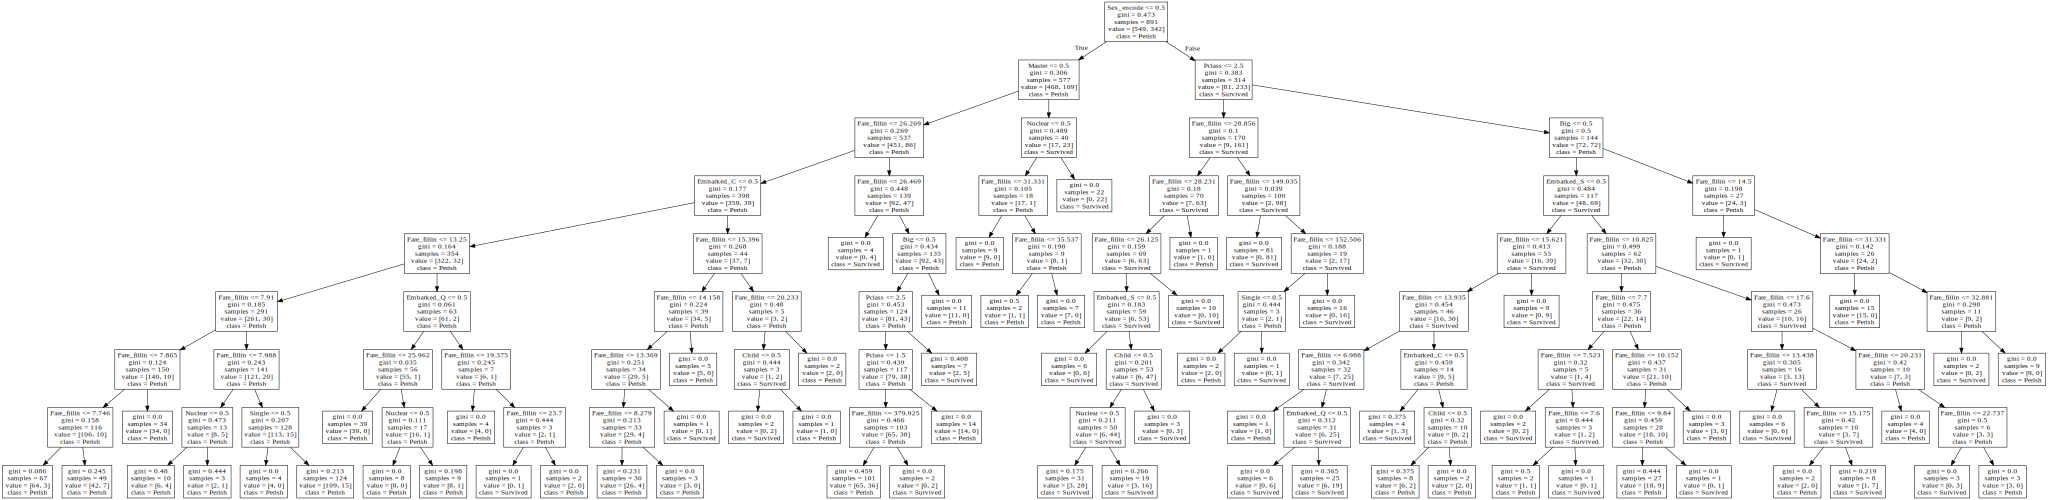

In [49]:
# graphviz 모듈을 가져옵니다.
import graphviz

# scikit-learn(줄여서 sklearn)의 tree 모듈에서 Decision Tree를 시각화 할 수 있는 export_graphviz를 가져옵니다.
from sklearn.tree import export_graphviz

# export_graphviz로 Decision Tree를 시각화합니다. 시각화 할 때는 다음의 옵션이 들어갑니다.
# 1) model. 시각화할 트리(Decision Tree) 입니다.
# 2) feature_names. 트리를 만들 때 사용한 feature들의 이름입니다.
# 3) class_names. 살았을 경우 시각화에서 어떻게 표현할 것인지(Survived), 반대로 죽었을 경우 시각화에서 어떻게 표현할 것인지(Perish)를 알려줍니다.
# 4) out_file. 시각화 겨롸를 저장할 파일명입니다. 이번에는 파일로 저장하지 않고 바로 쥬피터 노트북에 띄울 생각이므로 None을 주면 됩니다.
# 마지막으로 시각화한 결과를 dot_tree라는 이름의 변수에 저장합니다.
dot_tree = export_graphviz(model,
                           feature_names=feature_names,
                           class_names=["Perish", "Survived"],
                           out_file=None)

# graphviz에서 Source라는 기능을 통해 Decision Tree를 시각화합니다.
graphviz.Source(dot_tree)

## Predict

Decision Tree가 성공적으로 학습이 되었다면, 남은 것은 이 Decision Tree를 활용해 테스트 데이터에 있는 승객의 생존/사망 여부를 예측하는 것입니다. 예측은 ```model.predict```로 할 수 있으며, 이 때 test 데이터의 feature인 X_test가 필요합니다.

In [50]:
# fit이 끝났으면, predict라는 기능을 사용하여 생존 여부(Survived)를 예측합니다.
# predict의 실행이 끝나면 test 데이터의 생존 여부(Survived)를 반환하며, 이를 predictions라는 이름의 변수에 할당합니다.
predictions = model.predict(X_test)

# predictions 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(predictions.shape)

# predictions 변수에 값이 너무 많기 때문에, 상위 10개만 출력합니다.
predictions[0:10]

(418,)


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

## Submit

Decision Tree의 fit과 predict 를 통해 우리는 test 데이터에 있는 승객의 생존 여부(Survived)를 예측하였습니다. 이제 우리에게 남은 건 이를 캐글([kaggle](http://kaggle.com/))이 권장하는 제출(submission) 포멧에 맞게 정리한 뒤 파일로 저장하는 것입니다.

캐글의 타이타닉 경진대회([Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic))에서는 **gender_submission.csv**라는 제출 포멧을 제공합니다. ([다운로드 링크](https://www.kaggle.com/c/titanic/data)) 우리는 우리가 예측한 값을 이 제출 포멧에 맞게 집어넣고 저장할 것입니다.

In [51]:
# 캐글이 제공하는 제출 포멧(gender_submission.csv)을 읽어옵니다.
# PassengerId는 test 데이터와 동일하며, Survived는 남자일 경우 0, 여자는 1이 들어가 있습니다.
# 이를 submission 이라는 이름의 변수에 할당합니다.
submission = pd.read_csv("data/titanic/gender_submission.csv", index_col="PassengerId")

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [52]:
# 제출 포멧(submission)의 생존 여부(Survived) 컬럼에 우리의 예측값(predictions)를 집어넣습니다.
# 두 데이터 모두 길이가 418개로 동일하기 때문에, 등호(=)를 통해 쉽게 예측값을 넣을 수 있습니다.
submission["Survived"] = predictions

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [53]:
# 마지막으로 submission 변수에 들어간 값을 csv 형식의 데이터로 저장합니다.
submission.to_csv("data/titanic/decision-tree_0.81818.csv")

이제 캐글의 [제출 페이지(Submit Predictions)](https://www.kaggle.com/c/titanic/submit)로 이동해 **decision-tree_0.81818.csv** 파일을 제출하면 점수를 확인할 수 있습니다.